In [1]:
try:
  %tensorflow_version 2.x
except:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data preprocessing
X_train = X_train / 255.0
X_test = X_test / 255.0

# Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
   test_size=0.2)

X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [0]:
# TODO mostrar data

In [5]:
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
optim = tf.optimizers.Adam(learning_rate=3e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optim,
              metrics=['accuracy'])

In [7]:
# sanity check
history = model.fit(X_train, y_train,
                    batch_size=32, epochs=10,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 106us/sample - loss: 0.5351 - accuracy: 0.8158 - val_loss: 0.4284 - val_accuracy: 0.8478
Epoch 2/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.3865 - accuracy: 0.8620 - val_loss: 0.3694 - val_accuracy: 0.8685
Epoch 3/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.3422 - accuracy: 0.8753 - val_loss: 0.3381 - val_accuracy: 0.8793
Epoch 4/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.3132 - accuracy: 0.8854 - val_loss: 0.3530 - val_accuracy: 0.8719
Epoch 5/10
48000/48000 [==============================] - 4s 89us/sample - loss: 0.2934 - accuracy: 0.8917 - val_loss: 0.3512 - val_accuracy: 0.8751
Epoch 6/10
48000/48000 [==============================] - 4s 88us/sample - loss: 0.2775 - accuracy: 0.8974 - val_loss: 0.3098 - val_accuracy: 0.8923
Epoch 7/10
48000/48000 [==============================]

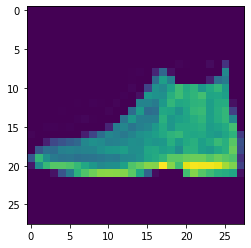

In [8]:
plt.imshow(X_test[0])

In [9]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax()

9

In [10]:
loss_value, acc = model.evaluate(X_test, y_test, verbose=0)
print('test accuracy: {}%'.format(acc * 100))

test accuracy: 88.99999856948853%


In [0]:
model.save('fashion_mnist.h5')